In [1]:
# import cv2 
from __future__ import print_function
import numpy as np 
import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:


# MAX_FEATURES = 5000
# GOOD_MATCH_PERCENT = 0.2

def alignImages(im1, im2):
    
    # Convert images to grayscale
    im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

    # Detect ORB features and compute descriptors.
    orb = cv2.ORB_create(MAX_FEATURES)
    #orb = cv2.AKAZE_create(MAX_FEATURES)
    keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
    keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

    # Match features.
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
    matches = matcher.match(descriptors1, descriptors2, None)

    # Sort matches by score
    matches.sort(key=lambda x: x.distance, reverse=False)

    # Remove not so good matches
    
    numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
    
  
    goodmatches = matches
    #matches = matches[:numGoodMatches]
    matches = [x for x in matches if x.distance <DISTANCE_THRESH]
    # Draw top matches

    imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
    cv2.imwrite("matches.jpg", imMatches)
    

    
    # Extract location of good matches
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)
    print(matches[0])
    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    # Find homography

    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
    
    return h
#     print(h)
#     height, width, channels = im2.shape

#     im1Reg = cv2.warpPerspective(im1, h, (width, height))
    
#     return im1Reg, h



  

In [20]:
path = "data"
f_bg = os.path.join(path, "blackboard.jpg")
f = os.path.join(path, "imgs/학원 전자칠판으로 수학문제 풀이 이제는 스마트하게! 대전 건쌤수학교습소 빔프로젝터 전자칠판 설치_151.jpg")
###### root --
###########날짜--
###############--images.jpg

In [21]:
MAX_FEATURES = 5000
GOOD_MATCH_PERCENT = 0.1
DISTANCE_THRESH = 45
k=2
res = 4





im_bg = cv2.imread(f_bg, cv2.IMREAD_COLOR)
im_bg=cv2.resize(im_bg,dsize=(720,480),interpolation=cv2.INTER_LINEAR)
# im_bg = cv2.cvtColor(im_bg, cv2.COLOR_BGR2RGB)

im = cv2.imread(f, cv2.IMREAD_COLOR)
im=cv2.resize(im,dsize=(720,480),interpolation=cv2.INTER_LINEAR)
# im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# al_image,h_im=alignImages(im, im2)
# cv2.imwrite('result.jpg',al_image)


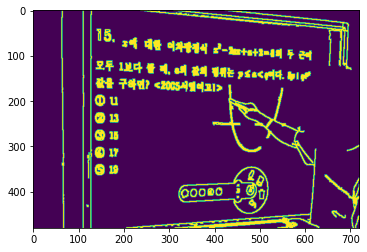

In [22]:
edge = cv2.Canny(im,50,150)

kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/25

dst = cv2.filter2D(edge, -1, kernel) # -1은 입력 영상과 동일한 데이터의 출력 영상 생성
dst = dst>0
dst= dst*255

plt.imshow(dst)
# 

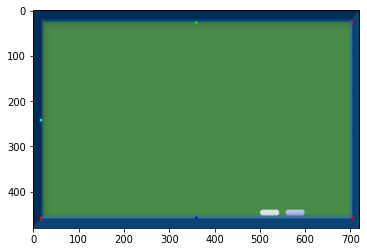

In [23]:
import copy
new_img = copy.deepcopy(im_bg)
for i in range(5):
    for j in range(5):
#         new_img[25+i, 15+j] = [255,0,0]
        new_img[25+i, 700+j] = [255,0,0]
        new_img[455+i, 15+j] = [255,0,0]
        new_img[455+i, 700+j] = [255,0,0]
        
        new_img[25+i, 357+j] = [0,255,0]
        new_img[455+i, 357+j] = [0,0,255]
        new_img[240+i, 15+j] = [0,255,255]
#         new_img[240+i, 700+j] = [255,0,255]
    
plt.imshow(new_img)

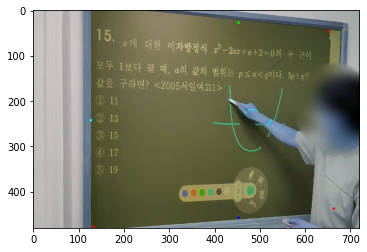

In [24]:
import copy
new_img = copy.deepcopy(im)
for i in range(5):
    for j in range(5):
        #new_img[25+i, 15+j] = [255,0,0]
        new_img[45+i, 650+j] = [255,0,0]
        new_img[474+i, 130+j] = [255,0,0]
        new_img[435+i, 660+j] = [255,0,0]
        
        new_img[25+i, 450+j] = [0,255,0]
        new_img[455+i, 450+j] = [0,0,255]
        new_img[240+i, 125+j] = [0,255,255]
#         new_img[240+i, 700+j] = [255,0,255]
    
plt.imshow(new_img)

[[ 9.59654896e-01 -1.90405939e-02 -1.01058672e+02]
 [-9.36343235e-02  8.27996321e-01  4.22403395e+01]
 [-3.92763771e-04  1.80222115e-05  1.00000000e+00]]


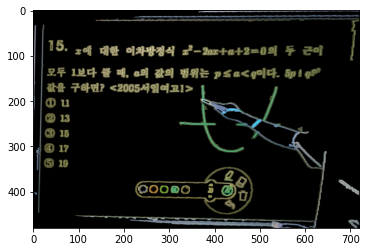

In [25]:
# Extract location of good matches
points1 = np.zeros((4, 2), dtype=np.float32)
points2 = np.zeros((4, 2), dtype=np.float32)

points1= np.array([[25.,700], [25, 357], [455, 357],[240, 15],[455,700],[455,15]])
points1[:,[0,1]] = points1[:,[1,0]]
points2 = np.array([[45.,650], [25, 450], [455, 450],[240, 125],[435,660], [490, 130]])
points2[:,[0,1]] = points2[:,[1,0]]

# Find homography

H, mask = cv2.findHomography(points2,points1, cv2.LMEDS)

print(H)
height, width, channels = im.shape

im_cpy = copy.deepcopy(im)
for i in range(480):
    for j in range(720):
        if dst[i,j]!=255:
            im_cpy[i,j]=0

im1Reg = cv2.warpPerspective(im_cpy, H, (width, height))


plt.imshow(im1Reg)

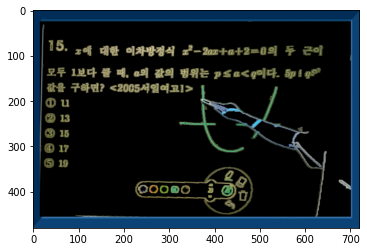

In [9]:
res = copy.deepcopy(im_bg)
for i in range(25,455):
    for j in range(15,700):
        if im1Reg[i,j].sum(0) != 0:
            res[i,j] = im1Reg[i,j]
        else:
            res[i,j] = [0,0,0]
plt.imshow(res)

<DMatch 0x7f8490132b90>


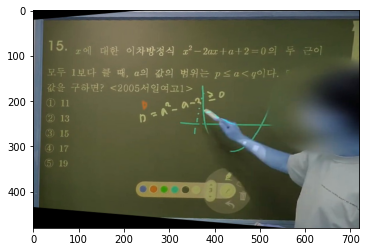

In [10]:
MAX_FEATURES = 5000
GOOD_MATCH_PERCENT = 0.1
DISTANCE_THRESH = 45
k=2
res = 4

f1 = os.path.join(path, "imgs/학원 전자칠판으로 수학문제 풀이 이제는 스마트하게! 대전 건쌤수학교습소 빔프로젝터 전자칠판 설치_151.jpg")
f2 = os.path.join(path, "imgs/학원 전자칠판으로 수학문제 풀이 이제는 스마트하게! 대전 건쌤수학교습소 빔프로젝터 전자칠판 설치_250.jpg")

im = cv2.imread(f1, cv2.IMREAD_COLOR)
im=cv2.resize(im,dsize=(720,480),interpolation=cv2.INTER_LINEAR)
# im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

im2 = cv2.imread(f2, cv2.IMREAD_COLOR)
im2=cv2.resize(im2,dsize=(720,480),interpolation=cv2.INTER_LINEAR)

# im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
h_im=alignImages(im2,im)

im2_Reg = cv2.warpPerspective(im2, H@h_im, (width, height))

plt.imshow(im2_Reg)

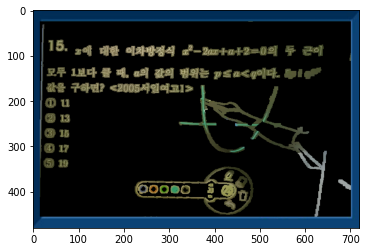

In [11]:
res = copy.deepcopy(im_bg)
for i in range(25,455):
    for j in range(15,700):
        if im1Reg[i,j].sum(0) != 0:
            res[i,j] = im2_Reg[i,j]
        else:
            res[i,j] = [0,0,0]
plt.imshow(res)

In [26]:
f = os.listdir("data/imgs")
flist = sorted(f)[1:]

f1=None
path = "data/imgs"

    
for idx, f in enumerate(flist):
    if f1 is None:
        f1 = os.path.join(path, f)
        continue
    
    f2 = os.path.join(path, f)

    im = cv2.imread(f1, cv2.IMREAD_COLOR)
    im=cv2.resize(im,dsize=(720,480),interpolation=cv2.INTER_LINEAR)
    # im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

    im2 = cv2.imread(f2, cv2.IMREAD_COLOR)
    im2=cv2.resize(im2,dsize=(720,480),interpolation=cv2.INTER_LINEAR)
    
    edge = cv2.Canny(im2,50,150)
    kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
    dst = cv2.filter2D(edge, -1, kernel) # -1은 입력 영상과 동일한 데이터의 출력 영상 생성
    dst = dst>0
    dst= dst*255
    
    # im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
    h_im=alignImages(im2,im)
    
    if H is None:
        H = h_im
    else:
        H = h_im@H
    
    
    im2[dst!=255] = 0
#     for i in range(480):
#         for j in range(720):
#             if dst[i,j]!=255:
#                 im2[i,j]=0
    
    im2_Reg = cv2.warpPerspective(im2, H, (width, height))
    
    res = copy.deepcopy(im_bg)
    res[25:455, 15:700] = 0
    res[25:455, 15:700] = im2_Reg[25:455, 15:700] * (im2_Reg[25:455, 15:700].sum(2)!=0).reshape(430,685,-1)
#     for i in range(25,455):
#         for j in range(15,700):
#             if im2_Reg[i,j].sum(0) != 0:
#                 res[i,j] = im2_Reg[i,j]
#             else:
#                 res[i,j] = [0,0,0]
    
    f1=f2
    
    cv2.imwrite("data/res/res{:03d}.jpg".format(idx), res)


<DMatch 0x7f8488118cb0>
<DMatch 0x7f8488523610>
<DMatch 0x7f848816df10>
<DMatch 0x7f848813d3b0>
<DMatch 0x7f848817f950>
<DMatch 0x7f8488523ab0>
<DMatch 0x7f8490056370>
<DMatch 0x7f848815ac50>
<DMatch 0x7f8488130ad0>
<DMatch 0x7f8488548e70>
<DMatch 0x7f8490027230>
<DMatch 0x7f8488158bf0>
<DMatch 0x7f8488523a10>
<DMatch 0x7f84900468d0>
<DMatch 0x7f848814b9d0>
<DMatch 0x7f84881753b0>
<DMatch 0x7f848853be50>
<DMatch 0x7f849005a350>
<DMatch 0x7f84900392d0>
<DMatch 0x7f84900464d0>
<DMatch 0x7f848817fe10>
<DMatch 0x7f848815a710>
<DMatch 0x7f849003fa70>
<DMatch 0x7f8488517190>
<DMatch 0x7f848811ee30>
<DMatch 0x7f8490027990>
<DMatch 0x7f848818dfb0>
<DMatch 0x7f84885484f0>
<DMatch 0x7f8488133990>
<DMatch 0x7f849005aaf0>
<DMatch 0x7f84881704b0>
<DMatch 0x7f84900462d0>
<DMatch 0x7f8490055630>
<DMatch 0x7f84885237d0>
<DMatch 0x7f848818ba50>
<DMatch 0x7f8488149a90>
<DMatch 0x7f8490050710>
<DMatch 0x7f848815f430>
<DMatch 0x7f848815b870>
<DMatch 0x7f8488523530>
<DMatch 0x7f8490787a50>
<DMatch 0x7f8490

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
from PIL import Image
import matplotlib.image as mpimg
paths = sorted(os.listdir("data/imgs"))[1:]
paths = [os.path.join("data/imgs",path) for path in paths]
paths = [ Image.open(i) for i in paths]
imageio.mimsave("origin.gif", paths, fps=10)

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
from PIL import Image
import matplotlib.image as mpimg
paths = sorted(os.listdir("data/res"))[1:]
paths = [os.path.join("data/res",path) for path in paths]
paths = [ Image.open(i) for i in paths]
imageio.mimsave("result3.gif", paths, fps=10)

In [30]:
paths = sorted(os.listdir("data/res"))[1:]
paths = [os.path.join("data/res",path) for path in paths]

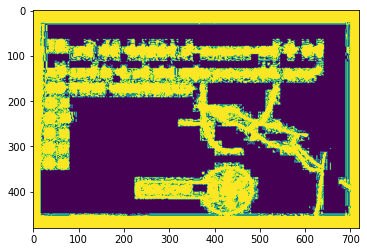

In [68]:
im1 = cv2.imread(paths[0], cv2.IMREAD_COLOR)
im2 = cv2.imread(paths[0], cv2.IMREAD_COLOR)
im3 = cv2.imread(paths[0], cv2.IMREAD_COLOR)
im4 = cv2.imread(paths[0], cv2.IMREAD_COLOR)
im5 = cv2.imread(paths[0], cv2.IMREAD_COLOR)

e1 = (im1.sum(2)>0)*255
e2 = (im2.sum(2)>0)*255
e3 = (im3.sum(2)>0)*255
e4 = (im4.sum(2)>0)*255
e5 = (im5.sum(2)>0)*255

tmp = (e1+e2+e3+e4+e5)/5

plt.imshow(tmp>128)

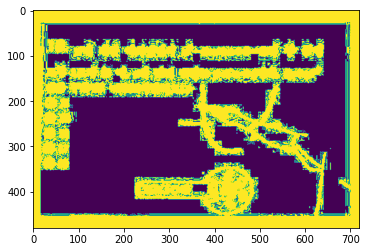

In [64]:
im = np.concatenate([e1,e2,e3,e4,e5]).reshape(5,480,720)

im = np.median(im,0)
plt.imshow(im)

720.0

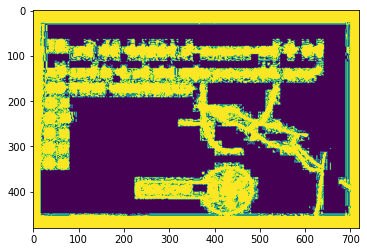

In [67]:
plt.imshow(e1)